<h2>Assignment 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams["figure.dpi"] = 100
np.set_printoptions(suppress=True)

### 1.

### (a)

As the unknown parameters increases in a model, the number of observations required for training it grows exponentially.

e.g.<br> In the beginning we have a one dimensional (one parameter) classification model with 5 classes, and 10 observations. <br>=> In average there are $10 \div 5 = 2$ samples in every class.

As we increase the dimension (add a new parameter) to create a two dimensional classification model, with the same obseravtion number. <br>=> In average there are $10 \div 5^2 = 0.4$ samples in every class.<br>=> To maintain the same sampling number we need to increase the observation number to 50.

As we increase the dimension (add a new parameter) to create another three dimensional classification model, with the same obseravtion number. <br>=> In average there are $10 \div 5^3 = 0.08$ samples in every class.<br>=> To maintain the same sampling number we need to increase the observation number to 250.

### (b)

Method 1: Eliminate the dimension (parameter, feature)

To avoid curse of dimensionality we can do feature selection before training instead of training the model with all the feature. In feature selection, we can rank the importance of a feature by it's p-value, and calculate the correlation of each pair of features. If a pair of feature is highly correlated, we can reduce the importance ranking of one of them, since highly correlated features won't increase the performace of the model significantly. Then, we can carefully add one dimension a time and evaluate whether adding one feature can increase the performace of model. Stop when the performace decreases.

Method 2: Increase the observation number of trainig data (not suggested)

To avoid curse of dimensionality we can collect more training data. However, this method is not practical beacause the data needed increases significantly (exponentially) when adding only a few parameters. 

****** Notes: dimension = parameter = feature

### (c)

In [3]:
# Read Data
furnace_df = pd.read_csv("MDS_Assignment1_furnace.csv")

In [4]:
# Multiple Regression
y = furnace_df['grade']

X_ar = np.array(furnace_df.iloc[:, 0:28])
xnames = np.array(furnace_df.columns[0:28])
X = pd.DataFrame(X_ar,columns = xnames)
X = sm.add_constant(X)

olsmod = sm.OLS(y, X)
result = olsmod.fit()
# print(result.summary())

In [5]:
# Rank Variables
rank = np.argsort(result.pvalues)
pvalues = result.pvalues
rankedVar = []
for i in rank:
    rankedVar.append(pvalues.index[i])
rankedVar.remove("const")

In [6]:
X_ar = np.array(furnace_df.iloc[:, 0:28])
xnames = np.array(furnace_df.columns[0:28])
X = pd.DataFrame(X_ar,columns = xnames)

adj_rsquare = []
arr = []
for i in rankedVar:
    arr.append(i)
    X_new = X[arr]
    X_new = sm.add_constant(X_new)

    olsmod = sm.OLS(y, X_new)
    result = olsmod.fit()
    
    adj_rsquare.append(result.rsquared_adj)

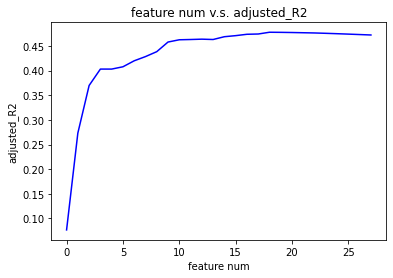

In [7]:
# draw plot
plt.plot(range(len(adj_rsquare)), adj_rsquare, color='blue')
plt.xlabel("feature num")
plt.ylabel("adjusted_R2")
plt.title("feature num v.s. adjusted_R2")
plt.show()

### 2.

### (a)

We will use the adult dataset found in Kaggle to demo data quality check. Source: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

The goal is to classify whether an individual’s annual income is greater than 50K.

In [8]:
# read data
data = pd.read_csv("adult.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Step 1: The data is collected from reliable source, and the website says "databases may change over time" so it is the newest data.

Step 2: The columns can be interpret clearly and is reasonable to consider these features (e.g. workclass can highly influence income in common thoughts).

Step 3: Check if there are lots of empty values

In [9]:
# check if the values are consisted among columns
data.info()
# count how many ? values
data = data.replace('?', np.NaN)
print("\nMissing value counts in data colums:")
for i in data.columns:
    print(i, data[i].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

Missing value counts in data colums:
age 0
workclass 2799
fnlwgt 0
educatio

Step 3: The type of columns are consistent and we can find the type of values. Also, there are 48842 observations which is sufficient enough to fit a model. Missing value counts are way smaller than 48842 observations, which can be imputated appropriately.

Step 4:

In [10]:
# Do simple linear regression
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native-country'].fillna(data['native-country'].mode()[0], inplace=True)
data = pd.get_dummies(data)

# Linear Regression
y = data['income_>50K']
X_ar = np.array(data.iloc[:, 0:104])
xnames = np.array(data.columns[0:104])
X = pd.DataFrame(X_ar,columns = xnames)
X = sm.add_constant(X)

log = sm.OLS(y, X)
result = log.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            income_>50K   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     291.6
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:31:29   Log-Likelihood:                -16617.
No. Observations:               48842   AIC:                         3.343e+04
Df Residuals:                   48745   BIC:                         3.428e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

Step 5: Check the distribution of the data.

In [11]:
import statsmodels.stats.outliers_influence as sso
import scipy.stats as stats
import statistics
import math

def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

In [12]:
# residual analysis
st, data, ss2 = sso.summary_table(result, alpha=0.01)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Normality test:<br>
H0 : Normal distributed<br>
H1 : Not normal distributed

In [13]:
# Normality test
stat, p = stats.shapiro(SD)
print('Shapiro Test: Statistics=%f, p=%f' % (stat, p))

Shapiro Test: Statistics=0.963424, p=0.000000


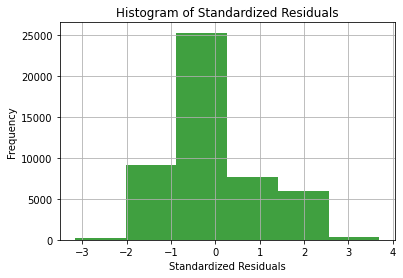

In [14]:
# Distribution histogram
mu = np.mean(SD)
sigma = np.std(SD)
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

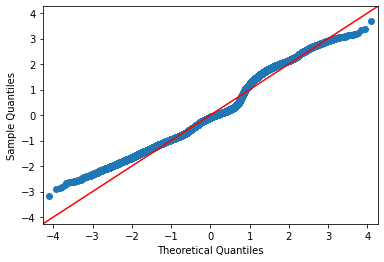

In [15]:
# qqplot
sm.qqplot(SD, line='45')
plt.show()

Since p-value < alpha = 0.01, we reject H0 at significance level at alpha = 0.01.<br>
Also, the qqplot and the histogram implies that it is not normally distributed.<br>

Independence test:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

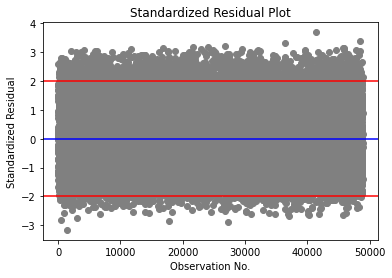

runs =  24479
n1 =  24421
n2 =  24421
runs_exp =  24422.0
stan_dev =  110.49999997683868
z =  0.5158371041805201
pval_z =  0.6059681854373298
p_value for Z-statistic=  0.6059681854373298


In [16]:
# Independence test
Id = data[:, 0]
plt.plot(Id, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median) 
print('p_value for Z-statistic= ', Z_pval)

Since n1>20 and n2>20, we can apply run test with normal distribution.<br>
Since p-value > alpha = 0.01, we can not reject H0 at significance level at alpha = 0.01.<br>
There is no evidence to infer the sample is not random selected.

Homogeneity of Variance test:<br>
H0 : Homogeneity of Variance<br>
H1 : Not Homogeneity of Variance

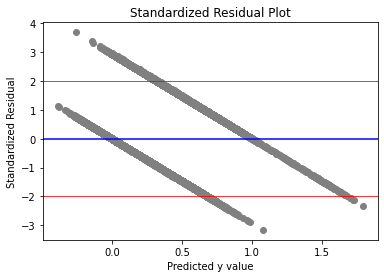

In [17]:
# Homogeneity of Variance test
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

From the plot above, it doesn't satisfy that the variation is constant and the mean is around 0. Thus, we reject H0. The residual doesn't satisfy the condition of homogeneity of variance.

From the above KPIs we can learn that this data set is a right skewed data set, randomness exists, and we may need to do feature selection after that since the residual doesn't satisfy the condition of homogeneity of variance.

After these analysis we can conclude that the quality of the data set is good enough for further research.

### (b)

1. Check whether the data is collected by reliable source, is the newest data and contents collected obeys the rules of security.
2. Check whether the column are interpretable and reasonable to predict our target and whether the data is enough (it depends on the model we are going to use).
3. Check if there are lots of empty values or columns and if the values are consisted among columns. If to much empty values, we should consider other data. Else, do imputation to fill it.
4. Check whether there exist some features that are important (p-value < 0.01) by doing simple regressions. We can also draw a heat map of correlation between features to understand the relation between features.
5. Check the distribution of the data. Every observation should be independent, and we should delete duplicate  observations.

### (c)

1. Normality test (e.g. Shapiro Test, draw plots of the distribution)
2. Independence test (e.g. Run Test)
3. Homogeneity of Variance test

### 3.

### (a)

As time interval and area changes, data may have different attributes or distributions.

Model applicability and extendibility is to maintain a certain level of predict accuracy when using the same model no matter how the data may change. It is a trade off between generalization and specialization of the model.

### (b)

Yes, because in <problem 1.> we will evaluate the importance of all features and pick the important features to do the final linear regression. This implies that when attributes or distributions the data set changes we can detect the difference when evaluating the features, and find out a new feature ranking. Also, we can decide how many features to choose from the ranking by the feature ranking. Which exactly matches the goal of model applicability and extendibility. However, we may make it better by using other non linear methods, so that we can have more applicability and extendibility when the distribution of data set becomes more complex.

### 4.

### (a)

Statistics imputation:<br>
Works well with small numerical datasets. Easy and fast.<br>
If the amount of missing data is larger than not missing data, the statistics imputation method may only encode the information of a small part of the whole data, which may not be representative.
    
Predictive imputation:<br>
Can be much more accurate than statistics imputation. => Need something better than Statistics imputation.<br>
However, it can cost more computational overhead. Also in the KNN method, outliers may have large effects if k is too small.<br>

Generative imputation:<br>
Can be the most accurate method among the three. => Have plenty of computation resource and thinks that  imputation strongly affects the preformance of the model.<br>
However, it can cost the most computational overhead among the three methods.<br>

### (b)

Some features may follow a trivial distribution or may be easily imputed by other existing features.<br>
If we delete the feature, we may loss some important messages encoded in that feature, which may cause overfitting or low accuracy of the prediction model.

<h3>5.

In [18]:
# loading the training dataset 
Steelplates_colname = pd.read_excel('MDS_Assignment2_Steelplates.xlsx', sheet_name = "Var_Name", header=None)
Steelplates_colname = np.array(Steelplates_colname[0])

Steelplates_df = pd.read_excel('MDS_Assignment2_Steelplates.xlsx', sheet_name = "Faults", names=Steelplates_colname, header=None)
Steelplates_df 

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [19]:
# split x and y
training_data_x = Steelplates_df.iloc[:,0:27]
# Bumps y_train
Bumps_y_train = Steelplates_df["Bumps"]
# K_Scratch y_train
K_Scratch_y_train = Steelplates_df["K_Scatch"]
# K_Scratch and Bumps y_train
# Steelplates_df["class"] = Steelplates_df["K_Scatch"] * 2 + Steelplates_df["Bumps"] + 1

### (1)

In [20]:
# two Logit Regression respectively
training_data_x = sm.add_constant(training_data_x)

log_reg_Bumps = sm.Logit(Bumps_y_train, training_data_x).fit()
log_reg_K_Scratch = sm.Logit(K_Scratch_y_train, training_data_x).fit()
print(log_reg_Bumps.summary())
print(log_reg_K_Scratch.summary())

Optimization terminated successfully.
         Current function value: 0.363107
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.055606
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                  Bumps   No. Observations:                 1941
Model:                          Logit   Df Residuals:                     1914
Method:                           MLE   Df Model:                           26
Date:                Fri, 28 Oct 2022   Pseudo R-squ.:                  0.2882
Time:                        15:31:31   Log-Likelihood:                -704.79
converged:                       True   LL-Null:                       -990.11
Covariance Type:            nonrobust   LLR p-value:                7.766e-104
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

### (2)

In [21]:
# log_reg_Bumps important features
result = log_reg_Bumps

# Rank Variables
ranked = pd.concat([result.tvalues, result.pvalues], keys = ["tvalues", "pvalues"], axis=1)
ranked.sort_values(by=['tvalues'], inplace = True)

# Display variables with p-values < 0.01
ranked = ranked[ranked.pvalues < 0.01]
display(ranked)

,tvalues,pvalues
Y_Maximum,-5.342929,9.145636e-08
X_Perimeter,-3.286806,1.013308e-03
Steel_Plate_Thickness,-3.208320,1.335127e-03
Luminosity_Index,-2.660547,7.801373e-03
Square_Index,3.096487,1.958286e-03
Y_Perimeter,4.556879,5.191922e-06
Edges_Index,4.959895,7.053116e-07
Edges_Y_Index,5.145659,2.665835e-07
Y_Minimum,5.342935,9.145368e-08


In [22]:
# log_reg_K_Scratch important features
result = log_reg_K_Scratch

# Rank Variables
ranked = pd.concat([result.tvalues, result.pvalues], keys = ["tvalues", "pvalues"], axis=1)
ranked.sort_values(by=['tvalues'], inplace = True)

# Display variables with p-values < 0.01
ranked = ranked[ranked.pvalues < 0.01]
display(ranked)

,tvalues,pvalues
Orientation_Index,-4.906238,9.283979e-07
Empty_Index,-2.778370,5.463243e-03
Edges_Index,-2.701153,6.909965e-03
Sum_of_Luminosity,-2.681213,7.335584e-03
Steel_Plate_Thickness,-2.657835,7.864439e-03
Pixels_Areas,2.787854,5.305842e-03
Outside_Global_Index,3.125883,1.772722e-03
Square_Index,3.229016,1.242168e-03
Log_Y_Index,3.478002,5.051652e-04
Edges_X_Index,3.624556,2.894585e-04


### (3)

In [23]:
from sklearn.linear_model import LogisticRegression

# Bumps
X = training_data_x
y = Bumps_y_train
clf = LogisticRegression()
clf.fit(X, y)
print("Mean Accuracy of Bumps Linear Discriminant Analysis:", clf.score(X, y))

# K_Scratch
X = training_data_x
y = K_Scratch_y_train
clf = LogisticRegression()
clf.fit(X, y)
print("Mean Accuracy of K_Scratch Linear Discriminant Analysis:", clf.score(X, y))

Mean Accuracy of Bumps Linear Discriminant Analysis: 0.7872230808861411
Mean Accuracy of K_Scratch Linear Discriminant Analysis: 0.9397217928902627


We prefer two seperate models instead of one. We found that the two target have distinct important features, thus, they are nearly independent. Two independent targets shouldn't be fit in the same model, this may explian why fitting two models are better than fitting one instead. However, the r-square of "log_reg_Bumps" is 0.2882 and "log_reg_K_Scratch" is 0.8893, which implies that logistic regression can classify 88% of "K_Scratch" correctly, while logistic regression can only classify 28% of "Bumps" correctly. The reason behind this could be the target label has no linear correlation with the features, which means it may not be linearly seperable.

### (4)

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Bumps
X = training_data_x
y = Bumps_y_train
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
print("Mean Accuracy of Bumps Linear Discriminant Analysis:", clf.score(X, y))

# K_Scratch
X = training_data_x
y = K_Scratch_y_train
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
print("Mean Accuracy of K_Scratch Linear Discriminant Analysis:", clf.score(X, y))

Mean Accuracy of Bumps Linear Discriminant Analysis: 0.8341061308603812
Mean Accuracy of K_Scratch Linear Discriminant Analysis: 0.9582689335394127


It perfroms quite good on the K_Scratch while performs not quite good on Bumps, the possible reason of it is the target is not linearly seperable or the data is not Gaussian distribution.

### (5)

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Bumps
X = training_data_x
y = Bumps_y_train
clf = QuadraticDiscriminantAnalysis()
clf.fit(X, y)
print("Mean Accuracy of Bumps Quadratic Discriminant Analysis:", clf.score(X, y))

# K_Scratch
X = training_data_x
y = K_Scratch_y_train
clf = QuadraticDiscriminantAnalysis()
clf.fit(X, y)
print("Mean Accuracy of K_Scratch Quadratic Discriminant Analysis:", clf.score(X, y))

Mean Accuracy of Bumps Quadratic Discriminant Analysis: 0.7408552292632664
Mean Accuracy of K_Scratch Quadratic Discriminant Analysis: 0.9809376609994848


It performs quite good on the K_Scratch while performs not quite good on Bumps, the possible reason of it is the target is not linearly seperable.